# Imports and Functions

## Imports

In [494]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import importlib
import keras
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.plotting import plot_confusion_matrix
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

from importlib import reload

In [2]:
import functions as fun

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Functions

In [4]:
# def format_titles(title_list):
#     """This function formats the movie titles in such a way that they can be
#     discerned by the web site where the screenplays will be taken from.
    
#     Parameter:
    
#         title_list: list
#         list of titles to be formatted, generally from metacritic.
        
#     Returns: 
    
#         list containing titles in the proper format for scraping screenplays from
#         springfieldspringfield.co.uk."""
    
#     # Initializing list for later
#     titles_formatted = []
    
#     # Will cycle through all titles and leave them in the correct format for
#     # later use.
#     for title in title_list:
#         title = title.lower()
        
#         # Titles on this site have ', the' at the end.
#         if title[:3] == 'the':
#             title = title[4:] + ', the'
        
#         # Getting rid of punctuation that wouldn't be in the url.
#         punctuations = """!()-[]{};:'"\,<>./?@#$%^&*~"""
#         for x in title: 
#             if x in punctuations: 
#                 title = title.replace(x, '')
        
#         # In the url, the spaces are hyphens.
#         for x in title:
#             title = title.replace('  ', '-')
#             title = title.replace(' ', '-')
#             title = title.replace('_', '-')
            
#         titles_formatted.append(title)

#     return titles_formatted

In [5]:
# def clean(word_list):
#     """Combines each script into one long string and removes punctuation and
#     html tags from the scripts. Note that this function is not always used,
#     depending on what is needed from the data.
    
#     Parameters:
    
#         word_list: list
#             List of words from one screenplay, usually in raw format
            
#     Returns:
    
#         A complete screenplay made of one long string with symbols and html
#         breaks removed."""
    
#     result = ''
    
#     # Each line of the scipt is broken into a separate string. This combines
#     # them into one long string.
#     for line in word_list:
#         result += str(line)
        
#     # This removes the line breaks. They should have already been removed 
#     # above but this is a backup.
#     while '<br/>' in result:
#         result = result.replace('<br/>', '')
        
#     # Removing punctuations.
#     punctuations = """!()-[]{};:"\,<>./?@#$%^&*_~"""
#     for char in result: 
#         if char in punctuations: 
#             result = result.replace(char, '')
    
#     return result

In [6]:
# def script_classifiers(X, y, classifier, cmap=plt.cm.Reds, use_tfidf=True):
#     """This function takes in values for a classifier and runs them through
#     a pipe. Generates scores and a confusion matrix plot.
    
#     Parameters:
        
#         X: DataFrame
#             Features and values to be used in model.
            
#         y: Series
#             Target variable for classifying.
            
#         Classifier: Classifier
#             Which classifier to be used for training the model.
        
#         cmap: pyplot color map
#             Which color map to use for the confusion matrix plot.
            
#         use_tfidf: bool
#             Whether to use tfidf on feature data prior to running model."""
    
#     # Typical train test split to retain data for validation.
#     X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=.3,
#                                                     random_state=42)
    
#     # There a few more bad scripts than good ones, so I'll make them even.
#     rus = RandomUnderSampler(random_state=42)
#     X_resampled, y_resampled = rus.fit_resample(pd.DataFrame(X_train), y_train)
    
#     # This is necessary for putting X into the correct format if there is only 
#     # one column, as it comes out of the resampler a DataFrame when the
#     # classifier actuallyl wants a series if its only one column.
#     if len(X_resampled.columns) < 2:
#         X_resampled = X_resampled.iloc[:, 0]
    
#     # Provides the option of using tfidf in case this is just using scripts 
#     # attributes and not text embedding or vectorization
#     if use_tfidf == False:
#         pipe = Pipeline([('clf', classifier)])
#     else:
        
#         # These tfidf hyper-parameters have been tested via grid-search
#         # elsewhere and found to be optimal.
#         pipe = Pipeline([('tfidf', TfidfVectorizer(max_df=.95, min_df=.1,
#                                                   max_features=5000,
#                                                   ngram_range=(1,2))), 
#                          ('clf', classifier)])
        
# #     scaler = StandardScaler
# #     X_resampled_scaled = scaler.fit_transform(X_resampled)
# #     X_test_scaled = scaler.transform(X_test)
    
#     # Fitting the pipeline containing the tfidf processor and classifier.
#     pipe.fit(X_resampled, y_resampled)
    
#     # Creating predicted data.
#     y_pred = pipe.predict(X_test)
    
#     # Running metrics and creating a confusion matrix visual.
#     print(classification_report(y_test, y_pred))

#     confusion = confusion_matrix(y_test, y_pred)
    
#     plot_confusion_matrix(confusion, figsize=(7,7), colorbar=True,
#                       show_normed=True, cmap=cmap);
#     plt.show();
    
#     # If there is a decision function in this classifier, we'll use it 
#     # to create an ROC AUC graph.
#     try:
#         y_score = pipe.decision_function(X_test)
#         fpr, tpr, thresholds = roc_curve(y_test, y_score)
#         roc_auc = auc(fpr, tpr)
#         print('roc_auc score: ', roc_auc)

#         plt.plot(fpr, tpr, color='darkorange', lw=2)
#         plt.title('Receiver Operating Characteristic (ROC) Curve')
#         plt.ylabel('True Positive Rate')
#         plt.xlabel('False Positive Rate')
#         plt.show();
#     except:
#         pass
    
# #     # Creating a decision tree classifier tree graph because it's cool.
# # #     if classifier == DecisionTreeClassifier():
# #     dot_data = export_graphviz(classifier, out_file=None, 
# # #                                    feature_names=X.columns, 
# #                                class_names=np.unique(y).astype('str'), 
# #                                filled=True, rounded=True, 
# #                                special_characters=True)

# #     # Draw graph
# #     graph = graph_from_dot_data(dot_data)  
# #     # Show graph
# #     Image(graph.create_png()) 
# #     return Image(graph.create_png()) 

In [7]:
# def hybrid_classifiers(X_train, X_test, y_train, y_test, classifier, 
#                        cmap=plt.cm.Reds, use_tfidf=True):
#     """This function takes in values for a classifier and runs them through
#     a pipe. Generates scores and a confusion matrix plot.
    
#     Parameters:
        
#         X: DataFrame
#             Features and values to be used in model.
            
#         y: Series
#             Target variable for classifying.
            
#         Classifier: Classifier
#             Which classifier to be used for training the model.
        
#         cmap: pyplot color map
#             Which color map to use for the confusion matrix plot.
            
#         use_tfidf: bool
#             Whether to use tfidf on feature data prior to running model."""
    
#     # Typical train test split to retain data for validation.
# #     X_train, X_test, y_train, y_test = train_test_split(X, y,
# #                                                     test_size=.3,
# #                                                     random_state=42)
    
#     # There a few more bad scripts than good ones, so I'll make them even.
#     rus = RandomUnderSampler(random_state=42)
#     X_resampled, y_resampled = rus.fit_resample(pd.DataFrame(X_train), y_train)
    
#     # This is necessary for putting X into the correct format if there is only 
#     # one column, as it comes out of the resampler a DataFrame when the
#     # classifier actuallyl wants a series if its only one column.
#     if len(X_resampled.columns) < 2:
#         X_resampled = X_resampled.iloc[:, 0]
    
#     # Provides the option of using tfidf in case this is just using scripts 
#     # attributes and not text embedding or vectorization
#     if use_tfidf == False:
#         pipe = Pipeline([('clf', classifier)])
#     else:
        
#         # These tfidf hyper-parameters have been tested via grid-search
#         # elsewhere and found to be optimal.
#         pipe = Pipeline([('tfidf', TfidfVectorizer(max_df=.95, min_df=.1,
#                                                   max_features=5000,
#                                                   ngram_range=(1,2))), 
#                          ('clf', classifier)])
        
# #     scaler = StandardScaler
# #     X_resampled_scaled = scaler.fit_transform(X_resampled)
# #     X_test_scaled = scaler.transform(X_test)
    
#     # Fitting the pipeline containing the tfidf processor and classifier.
#     pipe.fit(X_resampled, y_resampled)
    
#     # Creating predicted data.
#     y_pred = pipe.predict(X_test)
    
#     # Running metrics and creating a confusion matrix visual.
#     print(classification_report(y_test, y_pred))

#     confusion = confusion_matrix(y_test, y_pred)
    
#     plot_confusion_matrix(confusion, figsize=(7,7), colorbar=True,
#                       show_normed=True, cmap=cmap);
#     plt.show();
    
#     # If there is a decision function in this classifier, we'll use it 
#     # to create an ROC AUC graph.
#     try:
#         y_score = pipe.decision_function(X_test)
#         fpr, tpr, thresholds = roc_curve(y_test, y_score)
#         roc_auc = auc(fpr, tpr)
#         print('roc_auc score: ', roc_auc)

#         plt.plot(fpr, tpr, color='darkorange', lw=2)
#         plt.title('Receiver Operating Characteristic (ROC) Curve')
#         plt.ylabel('True Positive Rate')
#         plt.xlabel('False Positive Rate')
#         plt.show();
#     except:
#         pass
    
# #     # Creating a decision tree classifier tree graph because it's cool.
# # #     if classifier == DecisionTreeClassifier():
# #     dot_data = export_graphviz(classifier, out_file=None, 
# # #                                    feature_names=X.columns, 
# #                                class_names=np.unique(y).astype('str'), 
# #                                filled=True, rounded=True, 
# #                                special_characters=True)

# #     # Draw graph
# #     graph = graph_from_dot_data(dot_data)  
# #     # Show graph
# #     Image(graph.create_png()) 
# #     return Image(graph.create_png()) 

In [8]:
# def ceci_nest_pas_une_pipe(X, y, text_to_vec, classifier, 
#                            cmap=plt.cm.Reds):
#     """This function takes in values for a classifier and runs them through
#     a pipe. Generates scores and a confusion matrix plot. As opposed with 
#     the above 'script_classifiers' function, this one does not use a pipe,
#     lending some additional flexibility between vectorization and modeling.
#     Generally to be used with combining features and word vectors.
    
#     Parameters:
        
#         X: DataFrame
#             Features and values to be used in model.
            
#         y: Series
#             Target variable for classifying.
            
#         text_to_vec: word vector matrix
#             In addition to features, adds a word vector matrix to join with
#             the other features for modeling.
            
#         Classifier: Classifier
#             Which classifier to be used for training the model.
        
#         cmap: pyplot color map
#             Which color map to use for the confusion matrix plot."""

# #     if text_to_vec:
#     # Putting the TfidfVectorizer up front so I can fiddle with things
#     # before the classifier.
#     tfidf = TfidfVectorizer(max_df=.95, min_df=.1, max_features=5000,
#                              ngram_range=(1,2))
#     X2 = tfidf.fit_transform(text_to_vec)

#     # Creating a sparse DataFrame to house both the features and the 
#     # processed text.
#     X_temp = pd.SparseDataFrame(X2, columns=tfidf.get_feature_names(),
#                                default_fill_value=0)

#     # Necessary for next step.
#     X = X.reset_index(drop=True)

#     # Combining text matrix with script attributes.
#     for column in X:
#         X_temp[column] = X[column]
#     X = X_temp
    
#     # Standard train-test split.
#     X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=.3,
#                                                     random_state=42)
    
#     # There a few more bad scripts than good ones, so I'll make them even.
#     rus = RandomUnderSampler(random_state=42)
#     X_resampled, y_resampled = rus.fit_resample(pd.DataFrame(X_train), y_train)
   
#     # This is necessary for putting X into the correct format if there is only 
#     # one column, as it comes out of the resampler a DataFrame when the
#     # classifier actually wants a series if its only one column.
#     if type(X_resampled) == pd.core.series.Series:
#         X_resampled = X_resampled.iloc[:, 0]
    
#     # Classifier can be whatever the user has entered as an argument. 
#     clf = classifier
#     clf.fit(X_resampled, y_resampled)
    
# #     # The below is for creating the train scores.
# #     y_train_pred = clf.predict(X_train)
    
# #     # Printing out metrics and confusion matrix visual for training.
# #     print(classification_report(y_train, y_train_pred))
# #     print('Accuracy: ', accuracy_score(y_train, y_train_pred))

# #     confusion = confusion_matrix(y_train, y_train_pred)
# #     plot_confusion_matrix(confusion, figsize=(7,7), colorbar=True,
# #                   show_normed=True, cmap=cmap);
# #     plt.show();
    
#     # The below is for creating the test scores.
#     y_pred = clf.predict(X_test)
    
#     # Printing out metrics and confusion matrix visual for testing.
#     print(classification_report(y_test, y_pred))
#     print('Accuracy: ', accuracy_score(y_test, y_pred))

#     confusion = confusion_matrix(y_test, y_pred)
#     plot_confusion_matrix(confusion, figsize=(7,7), colorbar=True,
#                       show_normed=True, cmap=cmap);
#     plt.show();
    
#     # If there is a decision function in this classifier, we'll use it 
#     # to create an ROC AUC graph.
#     try:
#         y_score = classifier.decision_function(X_test)
#         fpr, tpr, thresholds = roc_curve(y_test, y_score)
#         roc_auc = auc(fpr, tpr)
#         print('roc_auc score: ', roc_auc)

#         plt.plot(fpr, tpr, color='darkorange', lw=2)
#         plt.title('Receiver Operating Characteristic (ROC) Curve')
#         plt.ylabel('True Positive Rate')
#         plt.xlabel('False Positive Rate')
#         plt.show();
#     except:
#         pass
    
#     if feature_importance:  
#         try:
#             print(pd.Series(clf.feature_importances_,
#                       index=X_train.columns).sort_values(ascending=False).head(200))
#             df_importance = pd.Series(clf.feature_importances_, 
#                                       index=X_train.columns)
#             df_imp_export = df_importance.sort_values(ascending=False)
#             df_importance = df_importance.sort_values(ascending=True).tail(200)
#         #         df_importance.index = [labels[x] for x,y in df_importance]
#             df_importance.plot(kind='barh', figsize=(8,50))
#             plt.title('Most Important Features')
#             plt.ylabel('Feature Name')
#             plt.xlabel('Feature Importance')
#             plt.show()
#         except: 
#             pass
    
    
# #     # Creating a decision tree classifier tree graph because it's cool.
# # #     if classifier == DecisionTreeClassifier():
# #     dot_data = export_graphviz(classifier, out_file=None, 
# # #                                    feature_names=X.columns, 
# #                                class_names=np.unique(y).astype('str'), 
# #                                filled=True, rounded=True, 
# #                                special_characters=True)

# #     # Draw graph
# #     graph = graph_from_dot_data(dot_data)  
# #     # Show graph
# #     Image(graph.create_png()) 
# #     return Image(graph.create_png()) 

In [9]:
# def grid_search_a(X, y, classifier, param_grid, use_tfidf=True):
#     """Performs a grid search to optimize parameters for classification models.
    
#     Parameters:
    
#         X: DataFrame
#             Features and values to be used in model.
            
#         y: Series
#             Target variable for classifying.
            
#         Classifier: Classifier
#             Which classifier to be used for training the model.
        
#         cmap: pyplot color map
#             Which color map to use for the confusion matrix plot.
            
#         use_tfidf: bool
#             Whether to use tfidf on feature data prior to running model.
            
#         Returns:
#             dictionary of best parameters."""

#     # Standard train-test split.
#     X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=.3,
#                                                     random_state=42)
    
#     # Under-sampling to even out the field.
#     rus = RandomUnderSampler(random_state=42)
#     X_resampled, y_resampled = rus.fit_resample(pd.DataFrame(X_train), y_train)

#     # If only one column, the classifier wants it as a series.
#     if len(X_resampled.columns) < 2:
#         X_resampled = X_resampled.iloc[:, 0]
    
#     # User has a choice to use a tfidf classifier or not.
#     if use_tfidf == False:
#         pipe = Pipeline([('clf', classifier)])
#     else:
#         pipe = Pipeline([('tfidf', TfidfVectorizer(max_df=.95, min_df=.1,
#                                                   max_features=5000,
#                                                   ngram_range=(1,2))), 
#                          ('clf', classifier)])
    
#     # Performs a grid search and generates the best parameter set.
#     grid_search = GridSearchCV(pipe, cv=None,
#                                return_train_score=True, verbose=10,
#                                scoring='accuracy', param_grid=param_grid,
#                                n_jobs=-1)

#     grid_search.fit(X_resampled, y_resampled)

#     # Create mean training and test scores.
#     training_score = np.mean(grid_search.cv_results_['mean_train_score'])
#     testing_score = grid_search.score(X_test, y_test)

#     # Spit out the results.
#     print(f"Mean Training Score: {training_score :.2%}")
#     print(f"Mean Test Score: {testing_score :.2%}")
#     print("Best Parameter Combination Found During Grid Search:")
#     print(grid_search.best_params_)

#     # Return the parameters so they can be seen and contemplated.
#     return grid_search.best_params_

In [228]:
def hybrid_classifier_combo(X_train, X_test, X2_train, X2_test,
                            y_train, y_test, classifier,
                            cmap=plt.cm.Reds, feature_importance=False):
    """This function takes in values for a classifier and runs them through
    a pipe. Generates scores and a confusion matrix plot. As opposed with 
    the above 'script_classifiers' function, this one does not use a pipe,
    lending some additional flexibility between vectorization and modeling.
    Generally to be used with combining features and word vectors.
    
    Parameters:
        
        X: DataFrame
            Features and values to be used in model.
            
        y: Series
            Target variable for classifying.
            
        text_to_vec: word vector matrix
            In addition to features, adds a word vector matrix to join with
            the other features for modeling.
            
        Classifier: Classifier
            Which classifier to be used for training the model.
        
        cmap: pyplot color map
            Which color map to use for the confusion matrix plot."""

#     if text_to_vec:
    # Putting the TfidfVectorizer up front so I can fiddle with things
    # before the classifier.
    tfidf = TfidfVectorizer(max_df=.95, min_df=.1, max_features=5000,
                             ngram_range=(1,2))
    X2_train = tfidf.fit_transform(X2_train)
    X2_test = tfidf.transform(X2_test)    

    # Creating a sparse DataFrame to house both the features and the 
    # processed text.
    X_temp = pd.SparseDataFrame(X2_train, columns=tfidf.get_feature_names(),
                               default_fill_value=0)
                                                        
    X_temp2 = pd.SparseDataFrame(X2_test, columns=tfidf.get_feature_names(),
                               default_fill_value=0)
    
    # Necessary for next step.
#     X_train = X_train.reset_index(drop=True)
#     X_test = X_test.reset_index(drop=True)
    
    # Combining text matrix with script attributes.
    for column in X_train:
        X_temp[column] = X_train[column]
        X_temp2[column] = X_test[column]
    X_train = X_temp
    X_test = X_temp2
    
#     print(X_test.CCONJ.isna().sum())
#     temp = pd.DataFrame(X2_train, columns=['temp'])
#     display(X_train.iloc[[40, 69, 101, 106, 147, 175, 264, 303, 343, 371, 392,
#              464, 656, 811, 963, 1099, 2024, 2044, 2066, 2265, 2554,2560]])
    
    X_test.fillna(0,inplace=True)
    X_train.fillna(0,inplace=True)
    # Standard train-test split.
#     X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=.3,
#                                                     random_state=42)
    
    # There a few more bad scripts than good ones, so I'll make them even.
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(pd.DataFrame(X_train), y_train)
   
    # This is necessary for putting X into the correct format if there is only 
    # one column, as it comes out of the resampler a DataFrame when the
    # classifier actuallyl wants a series if its only one column.
#     if type(X_resampled) == pd.core.series.Series:
#         X_resampled = X_resampled.iloc[:, 0]
    
    # Classifier can be whatever the user has entered as an argument. 
    clf = classifier
    clf.fit(X_resampled, y_resampled)
    
#     # The below is for creating the train scores.
#     y_train_pred = clf.predict(X_train)
    
#     # Printing out metrics and confusion matrix visual for training.
#     print(classification_report(y_train, y_train_pred))
#     print('Accuracy: ', accuracy_score(y_train, y_train_pred))

#     confusion = confusion_matrix(y_train, y_train_pred)
#     plot_confusion_matrix(confusion, figsize=(7,7), colorbar=True,
#                   show_normed=True, cmap=cmap);
#     plt.show();

    temp = pd.DataFrame(X_test, columns=['temp'])
    print(temp[temp['temp'].isna() == True].index)

#     temp = X_test.CCONJ.isna() == True
#     display(temp)
    
    # The below is for creating the test scores.
    y_pred = clf.predict(X_test)
    
    # Printing out metrics and confusion matrix visual for testing.
    print(classification_report(y_test, y_pred))
    print('Accuracy: ', accuracy_score(y_test, y_pred))

    confusion = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(confusion, figsize=(7,7), colorbar=True,
                      show_normed=True, cmap=cmap);
    plt.show();
    
    # If there is a decision function in this classifier, we'll use it 
    # to create an ROC AUC graph.
    try:
        y_score = classifier.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        print('roc_auc score: ', roc_auc)

        plt.plot(fpr, tpr, color='darkorange', lw=2)
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show();
    except:
        pass
    
    if feature_importance:  
        try:
            print(pd.Series(clf.feature_importances_,
                      index=X_train.columns).sort_values(ascending=False).head(200))
            df_importance = pd.Series(clf.feature_importances_, 
                                      index=X_train.columns)
            df_imp_export = df_importance.sort_values(ascending=False)
            df_importance = df_importance.sort_values(ascending=True).tail(200)
        #         df_importance.index = [labels[x] for x,y in df_importance]
            df_importance.plot(kind='barh', figsize=(8,50))
            plt.title('Most Important Features')
            plt.ylabel('Feature Name')
            plt.xlabel('Feature Importance')
            plt.show()
        except: 
            pass

# Modeling

## Bring in the data

Data previously saved in .csv format from eda.ipynb.

In [11]:
rotten_df_cut = pd.read_csv('../project_resources/rotten_df_cut.csv', index_col=0)
screenplays_cut = pd.read_csv('../project_resources/screenplays_cut.csv', index_col=0)
# Cutting off the old index columns added during import
# rotten_df_cut.drop(rotten_df_cut.columns[:2], axis=1, inplace=True)

Shuffling columns  for ease of use when modeling.

In [12]:
screen_cols = list(screenplays_cut.columns)
screen_cols.remove('good_or_bad')
screen_cols.append('good_or_bad')
screenplays_model = screenplays_cut[screen_cols].copy()

rotten_cols = list(rotten_df_cut.columns)
rotten_cols.remove('good_or_bad')
rotten_cols.append('good_or_bad')
rotten_cols.remove('rotten_scores')
rotten_cols.append('rotten_scores')
rotten_model = rotten_df_cut[rotten_cols].copy()
# rotten_model.drop('Titles', axis=1, inplace=True)

In [13]:
# sort_cols = list(rotten_model.columns[:38])
# sort_cols.extend(sorted(list(rotten_model.columns[38:-2])))
# sort_cols.extend(list(rotten_model.columns[-2:]))

In [14]:
# rotten_model = rotten_model[sort_cols]

Was going to use the below to ensure consistency between DataFrames.

In [15]:
# drop_from_rt = [col for col in rotten_df_cut.columns\
#                 if col not in screenplays_cut.columns]

In [16]:
# drop_from_screen = [col for col in screenplays_cut.columns\
#                     if col not in rotten_df_cut.columns]

In [17]:
# Temporary thing, might not need in the future once old jobs run.
# screenplays_model.drop('temp', axis=1, inplace=True)

More stuff that is now unnecessary, keeping for a little bit just in case.

In [18]:
# screenplays_model.drop(['UH', 'MD', 'IN', 'PRP', 'RB', 'VB', 'VBD', 'NNS'],
#                        axis=1, inplace=True)
# rotten_model.drop('RottenScores', axis=1, inplace=True)

# rotten_rename = dict(zip(rotten_model.columns, screenplays_model.columns))

# rotten_model.rename(columns=rotten_rename, inplace=True)

## TFIDF Vectorization

My first set of models will employ TFIDF Vectorization using a variety of classifiers.m

### Setup

For the modeling, I'm going to use the extreme ratings I got from metacritic.com for training the models, then use the rottentomatoes data, which is uniformly distributed from bad movies to good movies, to test the modeling.

In [230]:
X_train = screenplays_cut.no_stop
X_test = rotten_df_cut.no_stop

y_train = screenplays_cut.good_or_bad
y_test = rotten_df_cut.good_or_bad

### Linear SVC

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       811
           1       0.67      0.52      0.58       719

    accuracy                           0.65      1530
   macro avg       0.65      0.64      0.64      1530
weighted avg       0.65      0.65      0.65      1530



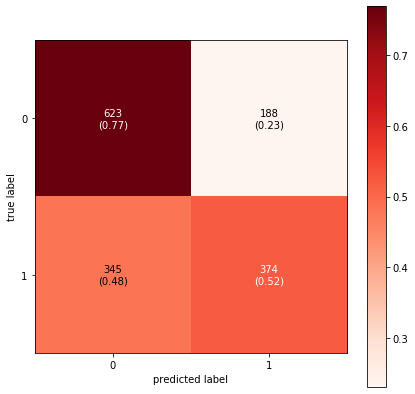

roc_auc score:  0.7007249073500837


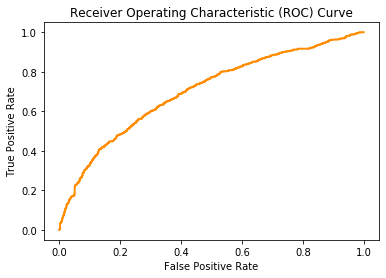

In [20]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, LinearSVC())

### SVC

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       811
           1       0.67      0.54      0.60       719

    accuracy                           0.66      1530
   macro avg       0.66      0.65      0.65      1530
weighted avg       0.66      0.66      0.66      1530



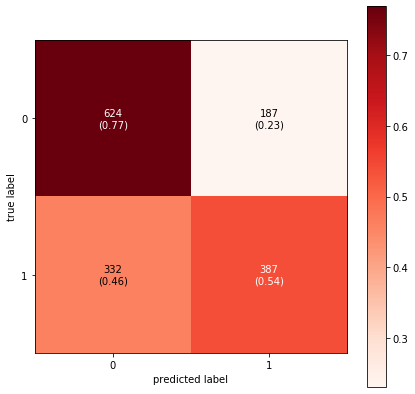

roc_auc score:  0.714379301297013


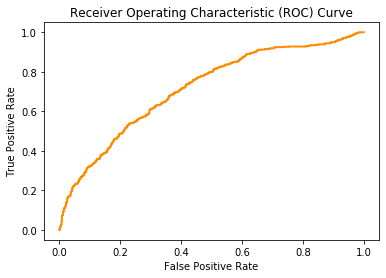

array([0, 0, 1, ..., 1, 1, 0])

In [337]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, SVC())

### Logistic Regression

              precision    recall  f1-score   support

           0       0.62      0.73      0.68       811
           1       0.63      0.50      0.56       719

    accuracy                           0.63      1530
   macro avg       0.63      0.62      0.62      1530
weighted avg       0.63      0.63      0.62      1530



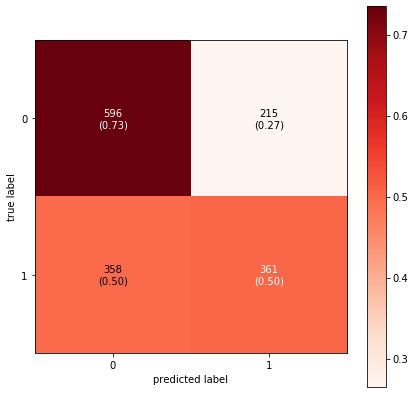

roc_auc score:  0.6713324609978579


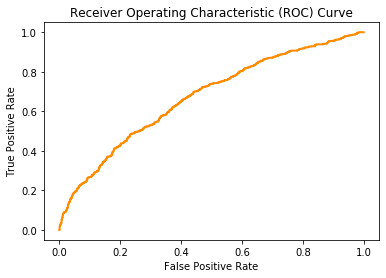

In [22]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, LogisticRegression())

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       811
           1       0.61      0.53      0.57       719

    accuracy                           0.62      1530
   macro avg       0.62      0.61      0.61      1530
weighted avg       0.62      0.62      0.62      1530



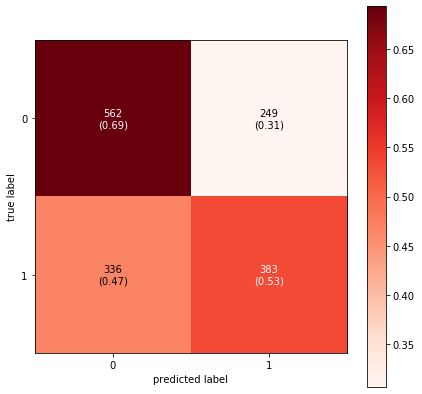

In [203]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, DecisionTreeClassifier())

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.62      0.77      0.69       811
           1       0.65      0.47      0.55       719

    accuracy                           0.63      1530
   macro avg       0.64      0.62      0.62      1530
weighted avg       0.63      0.63      0.62      1530



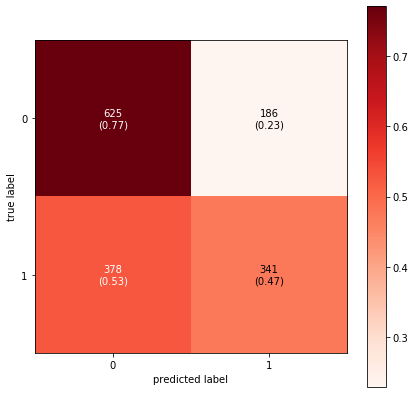

In [24]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, RandomForestClassifier(
                                                max_depth=8,
                                                criterion='entropy',
                                                min_samples_split=14,
                                                min_samples_leaf=1,
                                                max_features=160))

### XGBoost Classifier

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       811
           1       0.69      0.52      0.59       719

    accuracy                           0.67      1530
   macro avg       0.67      0.66      0.66      1530
weighted avg       0.67      0.67      0.66      1530



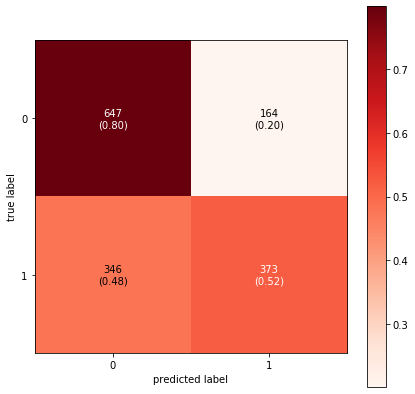

In [25]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, 
                   XGBClassifier(max_depth=8,
                                    criterion='entropy',
                                    min_samples_split=14,
                                    min_samples_leaf=1,
                                    max_features=160))

### Multinomial Bayes

              precision    recall  f1-score   support

           0       0.58      0.75      0.65       811
           1       0.58      0.39      0.47       719

    accuracy                           0.58      1530
   macro avg       0.58      0.57      0.56      1530
weighted avg       0.58      0.58      0.57      1530



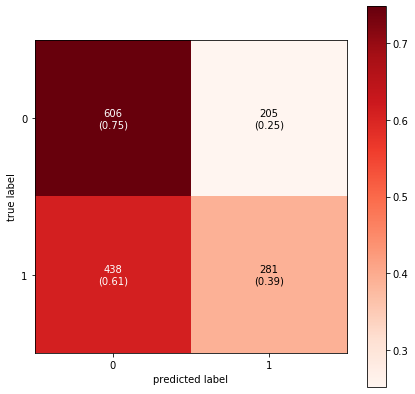

In [26]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, MultinomialNB())

### Neural Network

Because the neural network works so differently from the other classifiers, I haven't used a function, and the main code is all here.

In [27]:
# X_train = screenplays_cut.no_stop
# X_test = rotten_df_cut.NoStop

# y_train = screenplays_cut.good_or_bad
# y_test = rotten_df_cut.good_or_bad

# X = X.loc[~X.index.duplicated(keep='first')]
# y = y.loc[~y.index.duplicated(keep='first')]

Starting to put the data together.

In [28]:
X_train = pd.DataFrame(X_train)

# Undersampling to get things even just for ease of use.
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(pd.DataFrame(X_train), y_train)

X_resampled = X_resampled.iloc[:, 0]

Create the vector from the full batch of scripts.

In [29]:
tfidf = TfidfVectorizer(max_features=5000, max_df=.95, min_df=.1, 
                        ngram_range=(1,2))
X_t_train = tfidf.fit_transform(X_resampled)
X_t_test = tfidf.transform(X_test)

Getting the data into the format it will need to be in for the network.

In [30]:
X_t_train = pd.SparseDataFrame(X_t_train, columns=tfidf.get_feature_names(),
                           default_fill_value=0)
X_t_test = pd.SparseDataFrame(X_t_test, columns=tfidf.get_feature_names(),
                           default_fill_value=0)

X_t_num = np.array(X_t_train)
X_t_test_num = np.array(X_t_test)

y_t_num = np.array(y_resampled)
y_t_test_num = np.array(y_test)

layer_input = X_t_train.shape[1]

I played manually with a lot of different layers, neurons, drop layers, and regularization. Simple seemed to work best.

In [31]:
model = Sequential()

model.add(Dense(layer_input, input_dim=layer_input, activation='relu'))
model.add(Dense(50, input_dim=layer_input, activation='relu'))
model.add(Dense(50, input_dim=50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(loss='mean_squared_error',
              optimizer='adam', 
              metrics=['accuracy'])

model.fit(X_t_num, y_t_num, epochs=4, batch_size=50, validation_split=0.2)

Train on 2006 samples, validate on 502 samples
Epoch 1/4
2006/2006 [==============================] - 7s 3ms/step - loss: 0.1963 - accuracy: 0.7129 - val_loss: 0.1441 - val_accuracy: 0.8028
Epoch 2/4
2006/2006 [==============================] - 6s 3ms/step - loss: 0.1035 - accuracy: 0.8574 - val_loss: 0.2766 - val_accuracy: 0.6135
Epoch 3/4
2006/2006 [==============================] - 7s 3ms/step - loss: 0.0487 - accuracy: 0.9417 - val_loss: 0.0847 - val_accuracy: 0.8845
Epoch 4/4
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0349 - accuracy: 0.9591 - val_loss: 0.3199 - val_accuracy: 0.5976


In [33]:
# y_t_test = y_test

In [34]:
model.evaluate(X_t_test_num, y_t_test_num, verbose=1)

1530/1530 [==============================] - 1s 335us/step


[0.318488375272821, 0.6248366236686707]

              precision    recall  f1-score   support

           0       0.60      0.89      0.72       811
           1       0.72      0.33      0.45       719

    accuracy                           0.62      1530
   macro avg       0.66      0.61      0.58      1530
weighted avg       0.66      0.62      0.59      1530



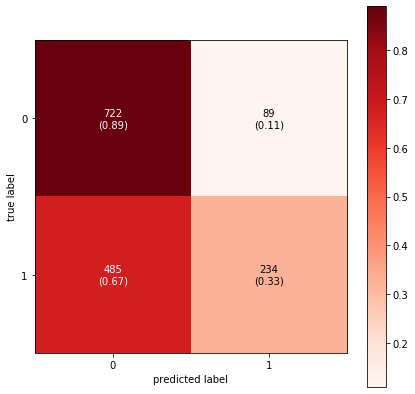

In [35]:
y_pred = model.predict_classes(X_t_test_num)

print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion, figsize=(7,7), colorbar=True,
                  show_normed=True, cmap=plt.cm.Reds);
plt.show();

Overall, a pretty positive model.

### TFIDF Summary

The models here were strong, overall. Most of them had accuracy of around 65%, with poor true positive rate of around 50, which means they were quite good at predicting which scripts were bad but not great at predicting which scripts were good. The decision tree had good true positive rate at 61%, but the accuracy wasn't as good at 58%. XG Boost had the best accuracy at 66, but the true positive rate of precisely 50%, with true negative rate 80%.

## Script Attributes

### Setup

For this set of modeling, I'm using only the script attributes from the dataframe, so basically word counts, punctuation ratios, sentence length, sentiment, and parts of speech.

In [36]:
screen_dummies = pd.get_dummies(screenplays_model['category'])
rotten_dummies = pd.get_dummies(rotten_model['category'])

In [44]:
columns = ['.', 'CC', 'VERB', 'CCONJ', 'PRON', 'sentiment_neutral', 
           'sentiment_positive', 'sentiment_compound', 'colon_ratios'] 
# columns = ['unique_words', 'word_count', 'sentence_length', 
#                     'sentiment_negative', 'sentiment_neutral', 
#                     'sentiment_positive', 'sentiment_compound',
#                     'ellipsis_ratios', 'semi_ratios', 'colon_ratios', 
#                     'comma_ratios']


columns = list(screenplays_model.columns[7:9])
columns.extend(list(screenplays_model.columns[10:19]))
start = list(screenplays_model.columns).index('PROPN')
columns.extend(list(screenplays_model.columns[start:-1]))
    
X = screenplays_cut[columns]
X_train = pd.merge(screenplays_model[columns], screen_dummies, left_index=True, 
             right_index=True)
X_test = pd.merge(rotten_model[columns], rotten_dummies, left_index=True, 
             right_index=True)

# X_train = screen_dummies
# X_test = rotten_dummies

# X_train = screenplays_model[columns]
# X_test = rotten_model[columns]

y_train = screenplays_model.good_or_bad
y_test = rotten_model.good_or_bad

In [45]:
# X_train = X.loc[~X.index.duplicated(keep='first')]
# y_train = y.loc[~y.index.duplicated(keep='first')]

### Support Vector Classifier

              precision    recall  f1-score   support

           0       0.55      0.74      0.64       811
           1       0.53      0.33      0.40       719

    accuracy                           0.55      1530
   macro avg       0.54      0.54      0.52      1530
weighted avg       0.54      0.55      0.53      1530



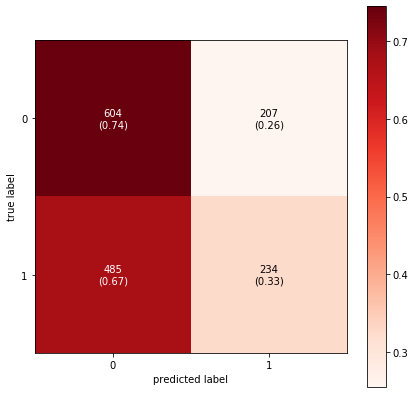

roc_auc score:  0.5536717834915943


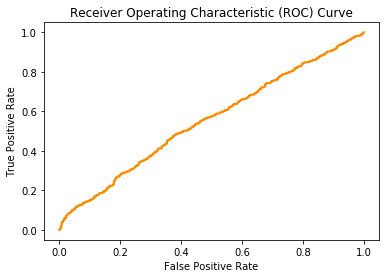

In [46]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, classifier=SVC(), 
                   use_tfidf=False)

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       811
           1       0.49      0.47      0.48       719

    accuracy                           0.52      1530
   macro avg       0.52      0.52      0.52      1530
weighted avg       0.52      0.52      0.52      1530



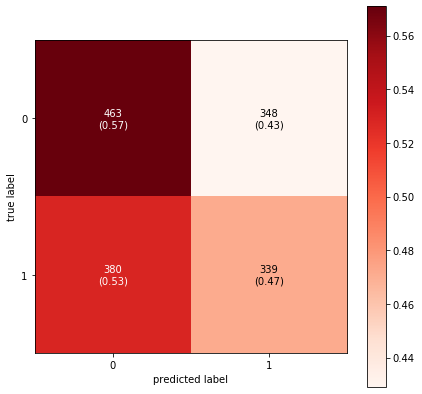

In [47]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, 
                   classifier=DecisionTreeClassifier(), use_tfidf=False)

### Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.53      0.99      0.69       811
           1       0.61      0.02      0.04       719

    accuracy                           0.53      1530
   macro avg       0.57      0.50      0.36      1530
weighted avg       0.57      0.53      0.38      1530



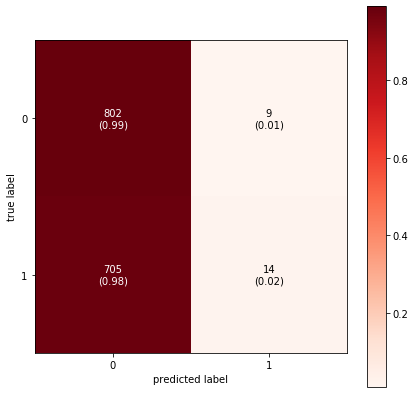

roc_auc score:  0.4992136976105668


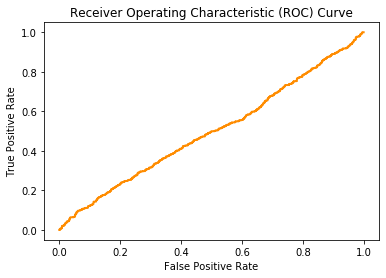

In [48]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, 
                   classifier=LogisticRegression(), use_tfidf=False)

### XG Boost Classifier

              precision    recall  f1-score   support

           0       0.59      0.43      0.50       811
           1       0.51      0.66      0.57       719

    accuracy                           0.54      1530
   macro avg       0.55      0.54      0.54      1530
weighted avg       0.55      0.54      0.53      1530



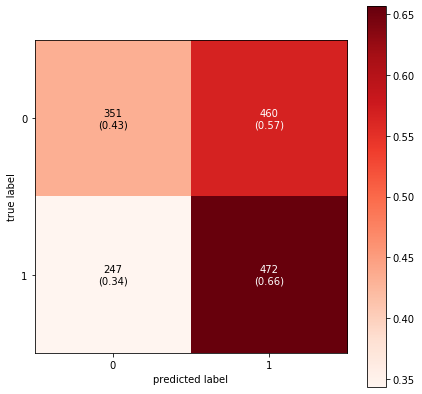

In [49]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, 
                   classifier=XGBClassifier(),use_tfidf=False)

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.60      0.42      0.49       811
           1       0.51      0.69      0.59       719

    accuracy                           0.55      1530
   macro avg       0.56      0.55      0.54      1530
weighted avg       0.56      0.55      0.54      1530



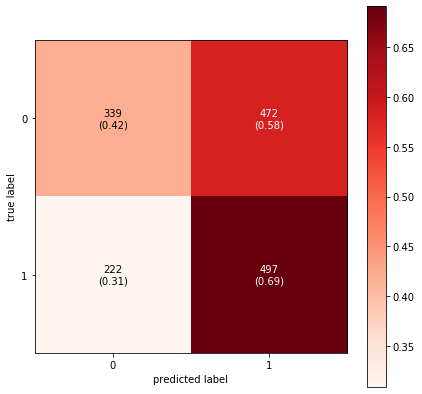

In [50]:
fun.hybrid_classifiers(X_train, X_test, y_train, y_test, 
                   classifier=RandomForestClassifier(random_state=42,
                                                    max_depth=8,
                                                    criterion='entropy',
                                                    min_samples_split=14,
                                                    min_samples_leaf=1,
#                                                     max_features=10),
                                                    ),
                  use_tfidf=False)

### Neural Network

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train = pd.DataFrame(X_train)

In [53]:
rus = RandomUnderSampler(random_state=42)
Xt_resampled, yt_resampled = rus.fit_resample(X_train, y_train)

In [54]:
# y_t_train = pd.get_dummies(yt_resampled)
X_t_train = np.array(Xt_resampled)
y_t_train = np.array(yt_resampled)

In [55]:
layer_input = X_t_train.shape[1]

In [56]:
model = Sequential()

model.add(Dense(64, input_dim=layer_input, activation='relu'))
model.add(Dense(32, input_dim=64, activation='relu'))
model.add(Dense(16, input_dim=32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.compile(loss='mean_squared_error',
              optimizer='adam', 
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                5632      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 8,257
Trainable params: 8,257
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_t_train, y_t_train, epochs=8, batch_size=50, validation_split=0.1)

Train on 2257 samples, validate on 251 samples
Epoch 1/8
2257/2257 [==============================] - 0s 92us/step - loss: 0.2362 - accuracy: 0.6247 - val_loss: 0.2831 - val_accuracy: 0.4502
Epoch 2/8
2257/2257 [==============================] - 0s 26us/step - loss: 0.1998 - accuracy: 0.7062 - val_loss: 0.2607 - val_accuracy: 0.5817
Epoch 3/8
2257/2257 [==============================] - 0s 25us/step - loss: 0.1814 - accuracy: 0.7390 - val_loss: 0.2654 - val_accuracy: 0.5896
Epoch 4/8
2257/2257 [==============================] - 0s 25us/step - loss: 0.1703 - accuracy: 0.7599 - val_loss: 0.2716 - val_accuracy: 0.5857
Epoch 5/8
2257/2257 [==============================] - 0s 25us/step - loss: 0.1589 - accuracy: 0.7820 - val_loss: 0.2931 - val_accuracy: 0.5458
Epoch 6/8
2257/2257 [==============================] - 0s 25us/step - loss: 0.1514 - accuracy: 0.7900 - val_loss: 0.2564 - val_accuracy: 0.5936
Epoch 7/8
2257/2257 [==============================] - 0s 26us/step - loss: 0.1416 - accu

In [60]:
X_t_test = X_test
y_t_test = y_test

In [61]:
model.evaluate(X_t_test, y_t_test, verbose=1)

1530/1530 [==============================] - 0s 14us/step


[0.5246181595385161, 0.46928104758262634]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       811
           1       0.47      1.00      0.64       719

    accuracy                           0.47      1530
   macro avg       0.23      0.50      0.32      1530
weighted avg       0.22      0.47      0.30      1530



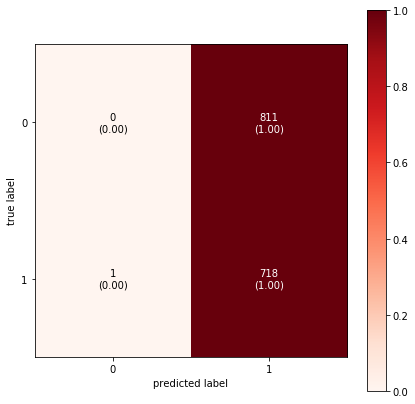

In [62]:
y_pred = model.predict_classes(X_t_test)

print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion, figsize=(7,7), colorbar=True,
                  show_normed=True, cmap=plt.cm.Reds);
plt.show();

### Scripts Attributes Summary

This set was much lower than the TFIDF, with scores that were only a little above random chance. The neural network simply classified everything as positive. I'm sure I could have done something to improve this batch given time, but for now, as it was so much lower than the TFIDF set, I chose to let it go.

## Combined TDIF & Attributes

### Setup

For this more experimental bunch, I thought I would try merging the TFIDF vecctorization matrix with the attributes from the original dataframe, wondering if more information might be better, and how the engineered features might play against the word matrix.

In [91]:
# screenplays_model = screenplays_model.copy().drop(
#     index=(screenplays_model[screenplays_model['word_count'] < 1000].index), axis=0)
# rotten_model = rotten_model.copy().drop(
#     index=(rotten_model[rotten_model['word_count'] < 1000].index), axis=0)

In [92]:
screen_dummies = pd.get_dummies(screenplays_model['category'])
rotten_dummies = pd.get_dummies(rotten_model['category'])

In [93]:
# columns = ['CC', 'VERB', 'CCONJ', 'PRON', 'sentiment_neutral', 
#            'sentiment_positive', 'sentiment_compound', 'colon_ratios']
columns = ['CCONJ']
# columns = ['unique_words', 'word_count', 'sentence_length', 
#                     'sentiment_negative', 'sentiment_neutral', 
#                     'sentiment_positive', 'sentiment_compound',
#                     'ellipsis_ratios', 'semi_ratios', 'colon_ratios', 
#                     'comma_ratios']

# for column in screenplays_model.columns[23:-1]:
#     columns.append(column)
    
# X = screenplays_cut[columns]
# X_train = pd.merge(screenplays_model[columns], screen_dummies, left_index=True, 
#              right_index=True)
# X_test = pd.merge(rotten_model[columns], rotten_dummies, left_index=True, 
#              right_index=True)

X_train = screenplays_model[columns].copy()
X_test = rotten_model[columns].copy()

# X = screenplays_cut[['unique_words', 'word_count']]
y_train = screenplays_model.good_or_bad.copy()
y_test = rotten_model.good_or_bad.copy()

In [94]:
X2_train = screenplays_model.no_stop
X2_test = rotten_model.no_stop
y_train = screenplays_model.good_or_bad
y_test = rotten_model.good_or_bad

In [95]:
# X_train = X_train.loc[~X_train.index.duplicated(keep='first')]
# y_train = y_train.loc[~y_train.index.duplicated(keep='first')]
# X_test = X_test.loc[~X_test.index.duplicated(keep='first')]
# y_test = y_test.loc[~y_test.index.duplicated(keep='first')]

### Linear Support Vector Classifier

In [96]:
# temp = pd.DataFrame(X2_train, columns=['temp'])
# temp[temp['temp'].isna() == True].index

In [97]:
# screenplays_model.iloc[[40, 69, 101, 106, 147, 175, 264, 303, 343, 371, 392,
#              464, 656, 811, 963, 1099, 2024, 2044, 2066, 2265, 2554, 2600]]

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       811
           1       0.67      0.51      0.58       719

    accuracy                           0.65      1530
   macro avg       0.66      0.64      0.64      1530
weighted avg       0.65      0.65      0.65      1530

Accuracy:  0.6516339869281046


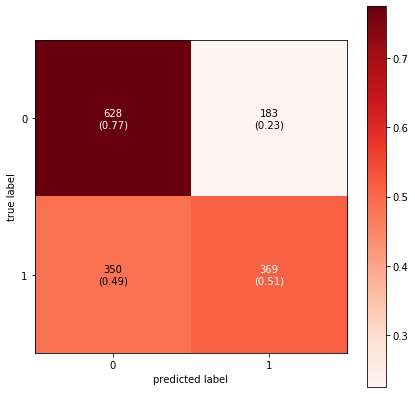

roc_auc score:  0.6980718870742862


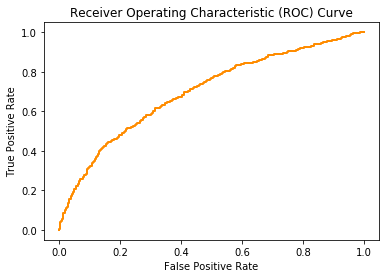

In [105]:
fun.hybrid_classifier_combo(X_train, X_test, X2_train, X2_test,
                        y_train, y_test, LinearSVC(C=.6))

### Support Vector Classifier

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       811
           1       0.55      0.48      0.51       719

    accuracy                           0.57      1530
   macro avg       0.56      0.56      0.56      1530
weighted avg       0.57      0.57      0.57      1530

Accuracy:  0.5679738562091503


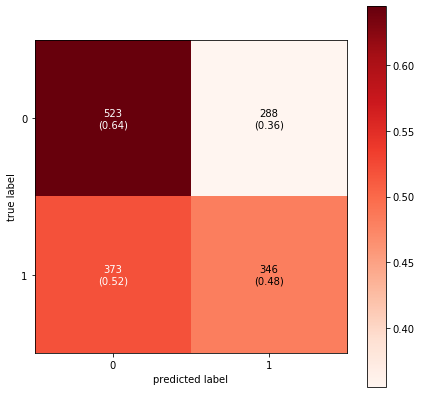

roc_auc score:  0.6022356026060307


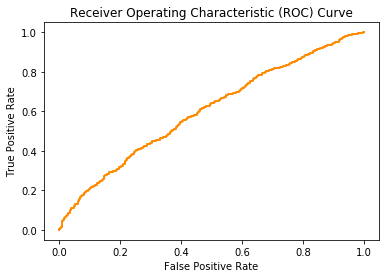

In [128]:
fun.hybrid_classifier_combo(X_train, X_test, X2_train, X2_test,
                        y_train, y_test, SVC(C=.1), feature_importance=False)

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       811
           1       0.58      0.57      0.58       719

    accuracy                           0.61      1530
   macro avg       0.61      0.61      0.61      1530
weighted avg       0.61      0.61      0.61      1530

Accuracy:  0.6071895424836601


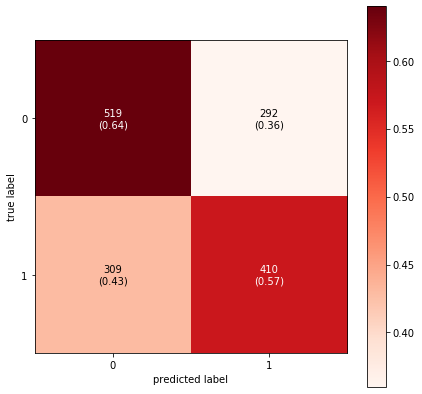

In [129]:
fun.hybrid_classifier_combo(X_train, X_test, X2_train, X2_test,
                        y_train, y_test, DecisionTreeClassifier())

### Logistic Regression Classifier

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.68      0.64      0.66       811
           1       0.62      0.66      0.64       719

    accuracy                           0.65      1530
   macro avg       0.65      0.65      0.65      1530
weighted avg       0.65      0.65      0.65      1530

Accuracy:  0.6483660130718955


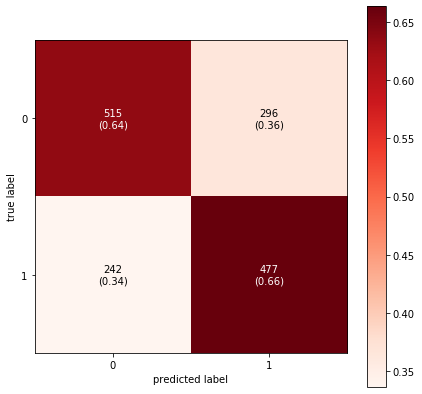

roc_auc score:  0.7072794280314658


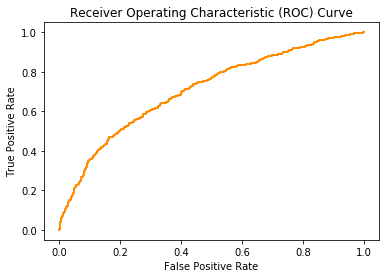

In [130]:
fun.hybrid_classifier_combo(X_train, X_test, X2_train, X2_test,
                        y_train, y_test, LogisticRegression(C=10))

### XG Boost Classifier

In [131]:
# hybrid_classifier_combo(X_train, X_test, X2_train, X2_test,
#                         y_train, y_test, XGBClassifier())
# XG Boost did not like the sparse dataframe for some reason. Skipping.

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       811
           1       0.68      0.47      0.56       719

    accuracy                           0.65      1530
   macro avg       0.66      0.64      0.63      1530
weighted avg       0.65      0.65      0.64      1530

Accuracy:  0.6477124183006536


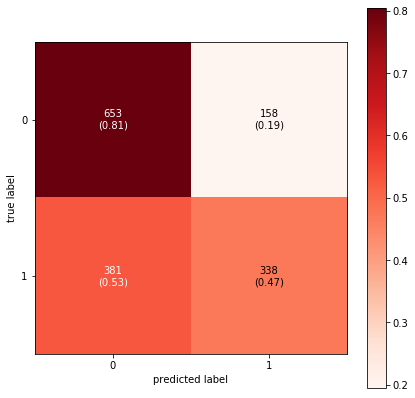

In [132]:
fun.hybrid_classifier_combo(X_train, X_test, X2_train, X2_test,
                        y_train, y_test, 
                        RandomForestClassifier(random_state=42, 
                                               n_jobs=-1),
                        feature_importance=False)

### Neural Network

Couldn't seem to get this model to work, though I tried plenty of different things. For a minute there, I had a model with an accuracy of .6 or so, but that was about the best I could do and it all went downhillf rom there.

In [184]:
screen_dummies = pd.get_dummies(screenplays_model['category'])
rotten_dummies = pd.get_dummies(rotten_model['category'])

In [185]:
# columns = ['.', 'CC', 'VERB', 'CCONJ', 'PRON', 'sentiment_neutral', 
#            'sentiment_positive', 'sentiment_compound', 'colon_ratios']
columns = ['unique_words', 'word_count', 'sentence_length', 
                    'sentiment_negative', 'sentiment_neutral', 
                    'sentiment_positive', 'sentiment_compound',
                    'ellipsis_ratios', 'semi_ratios', 'colon_ratios', 
                    'comma_ratios']

# for column in screenplays_model.columns[23:-1]:
#     columns.append(column)
    
X = screenplays_model[columns]
X_train = pd.merge(screenplays_model[columns], screen_dummies, left_index=True, 
             right_index=True)
X_test = pd.merge(rotten_model[columns], rotten_dummies, left_index=True, 
             right_index=True)

# X_train = screenplays_model[columns]
# X_test = rotten_model[columns]

y_train = screenplays_model.good_or_bad
y_test = rotten_model.good_or_bad

In [186]:
X2_train = screenplays_model.no_stop
X2_test = rotten_model.no_stop
y_train = screenplays_model.good_or_bad
y_test = rotten_model.good_or_bad

In [189]:
tfidf = TfidfVectorizer(max_features=5000, max_df=.95, min_df=.1, 
                        ngram_range=(1,2))
X2_t_train = tfidf.fit_transform(X2_train)
X2_t_test = tfidf.transform(X2_test)

In [199]:
X_sdf1 = pd.SparseDataFrame(X2_t_train, columns=tfidf.get_feature_names(),
                           default_fill_value=0)
X_sdf2 = pd.SparseDataFrame(X2_t_test, columns=tfidf.get_feature_names(),
                           default_fill_value=0)

for column in X_train:
    X_sdf1[column] = X_train[column]
    X_sdf2[column] = X_test[column]

In [170]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(pd.DataFrame(X_sdf1), y_train)

In [171]:
# X_shuffled = shuffle(X_resampled, random_state=42)
# y_shuffled = shuffle(y_resampled, random_state=42)

In [172]:
# X_t_train = pd.SparseDataFrame(X_resampled, columns=tfidf.get_feature_names(),
#                            default_fill_value=0)
# X_t_test = pd.SparseDataFrame(X_sdf2, columns=tfidf.get_feature_names(),
#                            default_fill_value=0)

# X_t_num = np.array(X_t_train)
# X_t_test_num = np.array(X_t_test)

# y_t_num = np.array(y_resampled)
# y_t_test_num = np.array(y_test)

In [173]:
layer_input = X_sdf1.shape[1]

In [174]:
model = Sequential()

model.add(Dense(layer_input, input_dim=layer_input, activation='tanh'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [175]:
model.compile(loss='squared_hinge',
              optimizer='sgd', 
              metrics=['accuracy'])

In [176]:
model.fit(X_resampled, y_resampled, epochs=15, batch_size=30, 
          validation_split=0.1)

Train on 2257 samples, validate on 251 samples
Epoch 1/15
2257/2257 [==============================] - 6s 2ms/step - loss: nan - accuracy: 0.0058 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/15
2257/2257 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/15
2257/2257 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/15
2257/2257 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/15
2257/2257 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/15
2257/2257 [==============================] - 6s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/15
2257/2257 [==============================] - 6s 2ms/step - loss: nan -

In [177]:
# X_test_shuffled = shuffle(X_sdf2, random_state=42)
# y_test_shuffled = shuffle(y_test, random_state=42)

In [178]:
model.metrics_names

['loss', 'accuracy']

In [179]:
model.evaluate(pd.DataFrame(X_sdf2), y_test, verbose=1)

1530/1530 [==============================] - 0s 310us/step


[nan, 0.0]

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       811
           1       0.00      0.00      0.00       719

    accuracy                           0.53      1530
   macro avg       0.27      0.50      0.35      1530
weighted avg       0.28      0.53      0.37      1530



//anaconda3/lib/python3.7/site-packages/keras/engine/sequential.py:272: RuntimeWarning:

invalid value encountered in greater

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



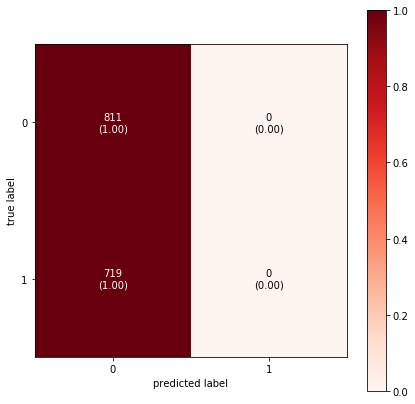

In [180]:
y_pred = model.predict_classes(pd.DataFrame(X_sdf2))

print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion, figsize=(7,7), colorbar=True,
                  show_normed=True, cmap=plt.cm.Reds);
plt.show();

## Stacked Modeling

This is one of my top models from the TFIDF modeling section. I'll use it as the first phase of a two-part modeling scenario.

First, I'm going to send in the movies from metacritic to train the first model, using the rottentomatoes data for testing. Then I'll marry the test predictions to the rottentomatoes (test) data, and send it through the second model, where it will get split into a proper train-test split.

In [230]:
X_train = screenplays_cut.no_stop
X_test = rotten_df_cut.no_stop

y_train = screenplays_cut.good_or_bad
y_test = rotten_df_cut.good_or_bad

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       811
           1       0.67      0.54      0.60       719

    accuracy                           0.66      1530
   macro avg       0.66      0.65      0.65      1530
weighted avg       0.66      0.66      0.66      1530



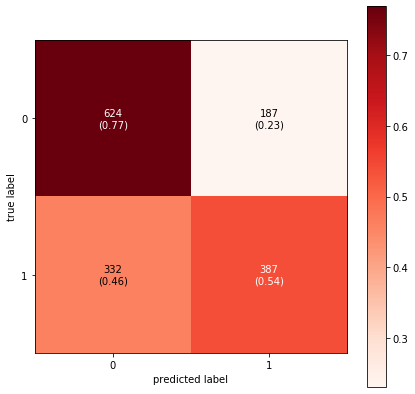

roc_auc score:  0.714379301297013


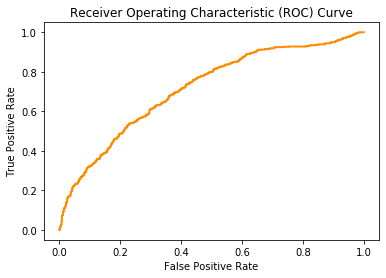

In [339]:
model_1_predictions = fun.hybrid_classifiers(X_train, X_test, y_train, y_test, SVC())

In [ ]:
# X = screenplays_model.no_stop
# y = screenplays_model.good_or_bad

# model_1_predictions = fun.stacked_classifier(X, y, SVC())

Below I'm getting the dummies and putting them all in one dataframe to be joined later.

In [393]:
screen_dummies = pd.get_dummies(screenplays_model['category'])
rotten_dummies = pd.get_dummies(rotten_model['category'])

In [394]:
# columns = ['sentiment_neutral', 'sentence_length', 'PRON', 'CCONJ', 'PUNCT', 'NNS',
#  '_SP', 'VBD', 'WDT', 'VB', 'PRP', 'RP', 'PRP$', 'CC', '.', 'IN', '-RRB-',
#  'VBP', 'WP', 'HYPH']

columns = ['word_count', 'unique_words']
columns.extend(rotten_model.columns[10:19])
columns.extend(rotten_model.columns[23:-2])

X = pd.merge(rotten_model[columns].copy(), rotten_dummies, left_index=True, 
             right_index=True)

y = rotten_model.good_or_bad.copy()

In [395]:
X['predictions'] = model_1_predictions

Using the test data from previously, since it had not yet seen the overfit training model.

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       152
           1       0.70      0.64      0.67       154

    accuracy                           0.68       306
   macro avg       0.68      0.68      0.68       306
weighted avg       0.68      0.68      0.68       306



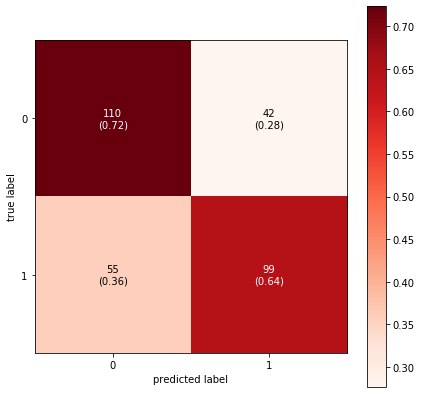

In [454]:
fun.script_classifiers(X, y,
                   classifier=RandomForestClassifier(random_state=42,
                                                    max_depth=9,
                                                    criterion='entropy',
                                                    min_samples_split=14,
                                                    min_samples_leaf=1,
                                                    n_estimators=103),
                      use_tfidf=False, test_size=.2)

This turned out to be my best model: SVC using TFIDF, then take the predictions from that, add them as a feature (to test data that has not been modeled) and run that data again through a random forest classifier: 68% accuracy, with a true positive rate of 64% and a true negative rate of 72%. Besides having the greatest accuracy, this model also turned out to be the most balanced.

## Linear Regression with Rottentomatoes

Next I attempted some regression models using data from rottontomatoes.

The models here are only the ones I kept. The others had results that were basically no better than chance.

### TFIDF with XGBoost Regressor

I grid searched the hell out of this one, only to find that none of it mattered. So I removed the grid search function.

In [458]:
X_train, X_test, y_train, y_test = train_test_split(rotten_model.no_stop,
                                                    rotten_model.rotten_scores,
                                                    test_size=.3,
                                                    random_state=42)

tfidf = TfidfVectorizer(max_features=5000, max_df=.9, min_df=.1, 
                        ngram_range=(1,2))
word_predictors = tfidf.fit_transform(X_train)
word_test = tfidf.transform(X_test)

model = XGBRegressor(random_state=42, n_estimators=100, 
                     objective='reg:squarederror')
model.fit(word_predictors, y_train)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

r2 and mse for train and test.

In [ ]:
def get_regression_scores(X_train, X_test, y_train_y_test, model):
    y_hat_train = model.predict(word_predictors)
    y_hat_test = model.predict(word_test)
    print('train MSE score: ', mse(y_train, y_hat_train))
    print('train r2_score: ', r2_score(y_train, y_hat_train))
    print('Test MSE score:', mse(y_test, y_hat_test))
    print('Test R-sq score:', r2_score(y_test, y_hat_test))

In [461]:
y_hat_train = model.predict(word_predictors)
y_hat_test = model.predict(word_test)
print('train MSE score: ', mse(y_train, y_hat_train))
print('train r2_score: ', r2_score(y_train, y_hat_train))
print('Test MSE score:', mse(y_test, y_hat_test))
print('Test R-sq score:', r2_score(y_test, y_hat_test))

train MSE score:  169.995391951505
train r2_score:  0.7976318013144681
Test MSE score: 786.8399855309698
Test R-sq score: 0.03388834695151299


In [670]:
train_residuals = y_hat_train - list(y_train)
test_residuals = y_hat_test - list(y_test)
print('Ave deviation from actual: ', round(sum(abs(test_residuals)) / len(test_residuals),2))

Ave deviation from actual:  23.8


Creating a dataframe comparing predicted scores to actual scores.

In [480]:
actual_v_predicted = X_test.to_frame()

pred_scores = list(y_hat_test)

actual_v_predicted['predicted_scores'] = pred_scores

to_merge = rotten_model[['titles', 'rotten_scores']]

actual_v_predicted = actual_v_predicted.merge(to_merge, left_index=True,
                                              right_index=True)

actual_v_predicted = actual_v_predicted[['titles','rotten_scores',
                                         'predicted_scores']]

actual_v_predicted['predicted_scores'] = actual_v_predicted.predicted_scores.\
    apply(lambda x: int(x))

In [481]:
actual_v_predicted

,titles,rotten_scores,predicted_scores
655,a-cure-for-wellness,41,46
76,big-mommas-like-father-like-son,4,38
316,all-eyez-on-me,18,28
1352,pavarotti,86,61
572,state-like-sleep,35,49
921,despicable-me-3,57,43
757,goosebumps-2-haunted-halloween,47,37
1506,mcqueen,98,72
1344,come-to-daddy,86,40
1197,serendipity,76,44


In [479]:
upside = len(actual_v_predicted[(actual_v_predicted.rotten_scores > 50) \
                   & (actual_v_predicted.predicted_scores > 50)])
upside

downside = len(actual_v_predicted[(actual_v_predicted.rotten_scores < 50) \
                   & (actual_v_predicted.predicted_scores < 50)])
downside

all_sides = len(actual_v_predicted)
all_sides

capture_in_half = (upside + downside) / len(actual_v_predicted)
print('Scores captured in same half (upper vs lower): ', capture_in_half)

Scores captured in same half (upper vs lower):  0.579520697167756


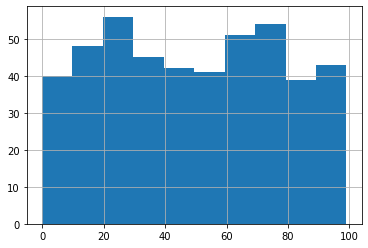

In [486]:
actual_v_predicted.rotten_scores.hist();

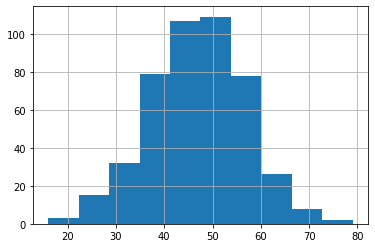

In [487]:
actual_v_predicted.predicted_scores.hist();

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



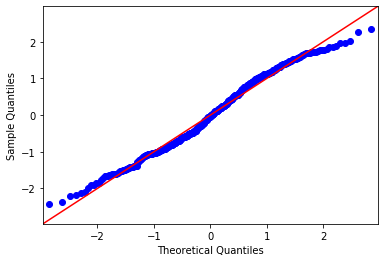

In [495]:
fig = sm.graphics.qqplot(test_residuals, dist=stats.norm, line='45', fit=True)
fig.show();

In [485]:
actual_v_predicted

,titles,rotten_scores,predicted_scores
655,a-cure-for-wellness,41,46
76,big-mommas-like-father-like-son,4,38
316,all-eyez-on-me,18,28
1352,pavarotti,86,61
572,state-like-sleep,35,49
921,despicable-me-3,57,43
757,goosebumps-2-haunted-halloween,47,37
1506,mcqueen,98,72
1344,come-to-daddy,86,40
1197,serendipity,76,44


### Features Only with XG Boost Regressor

Setting up all the features for a features-only (non-tfidf) regression model.

In [795]:
# Need to change this as the model chokes on the period.
rotten_model.rename(columns={'.':'PER'}, inplace=True)

# Dropping out the unnecessary columns.
to_drop = list(rotten_model.columns[:7])
to_drop.append(rotten_model.columns[9])
to_drop.extend(rotten_model.columns[19:22])
to_drop.extend(rotten_model.columns[-2:])

to_drop_2 = ['sentiment_compound', 'unique_words', 'X', 'JJ', 'NNP', 'DET',
             'semi_ratios', 'ADJ']

predictors_all = rotten_df_cut.copy()
predictors_all.drop(to_drop, axis=1, inplace=True)
predictors_all.drop(to_drop_2, axis=1,inplace=True)

# Adding dummy categories.
# rotten_dummies = pd.get_dummies(rotten_model['category'])
# predictors_all = pd.merge(predictors_all, rotten_dummies, left_index=True, 
#              right_index=True)

In [796]:
X_train, X_test, y_train, y_test = train_test_split(predictors_all,
                                                    rotten_model.rotten_scores,
                                                    test_size=.3)

In [716]:
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                          columns = X_train.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test), 
                            columns=X_test.columns)

In [717]:
scaled_y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
scaled_y_test = scaler.transform(np.array(y_test).reshape(-1,1))
scaled_y_train = pd.Series(scaled_y_train.reshape(-1,), name='rotten_scores')
scaled_y_test = pd.Series(scaled_y_test.reshape(-1,), name='rotten_scores')

In [718]:
scaled_X_train.fillna(0, inplace=True)
scaled_X_test.fillna(0, inplace=True)

In [719]:
def test(x):
    if x == 0:
        return math.log((X + 1) / 100)
    else:
        return math.log(x / 100)

In [733]:
model = XGBRegressor(random_state=42, n_estimators=100, 
                     objective='reg:squarederror')
model.fit(scaled_X_train, y_train)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Making predictions and calculating residuals

In [734]:
y_hat_train = model.predict(pd.DataFrame(scaled_X_train))
y_hat_test = model.predict(pd.DataFrame(scaled_X_test))

train_residuals = y_hat_train - list(y_train)
test_residuals = y_hat_test - list(y_test)

In [735]:
print('Ave deviation from actual: ', round(sum(abs(test_residuals)) / len(test_residuals),2))

Ave deviation from actual:  23.64


In [736]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 321.9570651816693
Test Mean Squarred Error: 781.9911459512771


In [737]:
print('R^2 score:', r2_score(y_test,y_hat_test))

R^2 score: 0.06390971708427473


In [738]:
y_pred = model.predict(scaled_X_test)

Creating dataframe of predicted scores vs. actual

In [739]:
actual_v_predicted = X_test.copy()

pred_scores = list(y_pred)

actual_v_predicted['predicted_scores'] = pred_scores

to_merge = rotten_model[['titles', 'rotten_scores']]

actual_v_predicted = actual_v_predicted.merge(to_merge, left_index=True,
                                              right_index=True)

actual_v_predicted = actual_v_predicted[['titles','rotten_scores',
                                         'predicted_scores']]

actual_v_predicted['predicted_scores'] = actual_v_predicted.predicted_scores.\
    apply(lambda x: int(x))

actual_v_predicted = actual_v_predicted[actual_v_predicted['predicted_scores'] <= 100]

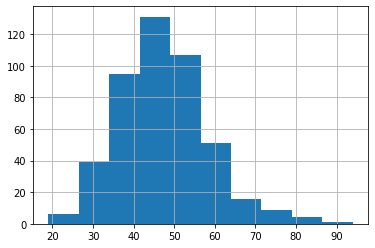

In [740]:
actual_v_predicted.predicted_scores.hist()

In [741]:
actual_v_predicted

,titles,rotten_scores,predicted_scores
584,blue-iguana,36,38
164,best-of-me-the,9,36
302,bye-bye-man-the,18,43
1112,last-photograph-the,70,52
1369,kid-who-would-be-king-the,88,54
1429,premature,92,50
342,book-of-henry-the,21,44
1354,sgt-stubby-an-american-hero,87,63
1472,irishman-the,95,47
1249,alpha,79,94


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



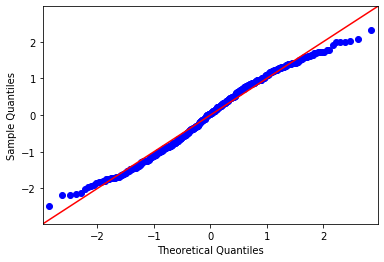

In [742]:
fig = sm.graphics.qqplot(test_residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### TFIDF with Features with XG Boost Regressor

In [797]:
X = predictors_all

In [798]:
tfidf = TfidfVectorizer(max_features=5000, max_df=.9, min_df=.1, 
                        ngram_range=(1,2))
X2 = tfidf.fit_transform(rotten_model.no_stop)

In [799]:
# Creating a sparse DataFrame to house both the features and the 
# processed text.
X_temp = pd.SparseDataFrame(X2, columns=tfidf.get_feature_names(),
                           default_fill_value=0)
# Necessary for next step.
X = X.reset_index(drop=True)

# Combining text matrix with script attributes.
for column in X:
    X_temp[column] = X[column]
X = X_temp

In [800]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X), y, random_state=42,
                                                    test_size=.3)

In [801]:
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                          columns = X_train.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test), 
                            columns=X_test.columns)

In [802]:
scaled_y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
scaled_y_test = scaler.transform(np.array(y_test).reshape(-1,1))
scaled_y_train = pd.Series(scaled_y_train.reshape(-1,), name='rotten_scores')
scaled_y_test = pd.Series(scaled_y_test.reshape(-1,), name='rotten_scores')

In [804]:
scaled_X_train.fillna(0, inplace=True)
scaled_X_test.fillna(0, inplace=True)

In [805]:
def test(x):
    if x == 0:
        return math.log((X + 1) / 100)
    else:
        return math.log(x / 100)

In [806]:
model = XGBRegressor(random_state=42, n_estimators=100, 
                     objective='reg:squarederror')
model.fit(scaled_X_train, y_train)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [807]:
y_hat_train = model.predict(pd.DataFrame(scaled_X_train))
y_hat_test = model.predict(pd.DataFrame(scaled_X_test))

In [808]:
train_residuals = y_hat_train - list(y_train)
test_residuals = y_hat_test - list(y_test)

In [773]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.054401228515797505
Test Mean Squarred Error: 0.23082222104931627


In [813]:
print('r^2 score:', r2_score(y_test,y_hat_test))

r^2 score: 0.07667167249770279


Overall, the regression didn't work out that well. I probably could have done more with it with more time, and it would be interesting to get deeper into it. 